In [1]:
''' Name: Shiny Patel
    Email: patelshiny44@gmail.com '''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# A)
df = pd.read_csv('screening_exercise_orders_v201810.csv')
print(df.sort_values('customer_id')[:10])

      customer_id  gender                 date  value  predicted_gender
0            1000       0  2017-01-01 00:11:31  198.5                 1
1            1001       0  2017-01-01 00:29:56  338.0                 1
2            1002       1  2017-01-01 01:30:31  733.0                 1
1742         1002       1  2017-02-19 21:35:31  176.0                 1
928          1002       1  2017-01-23 04:33:38  148.6                 1
3            1003       1  2017-01-01 01:34:22  772.0                 1
676          1003       1  2017-01-20 05:56:10  425.5                 1
4292         1003       1  2017-04-25 09:54:54    0.0                 1
4323         1003       1  2017-04-26 02:37:20  704.0                 1
4            1004       0  2017-01-01 03:11:54  508.0                 1


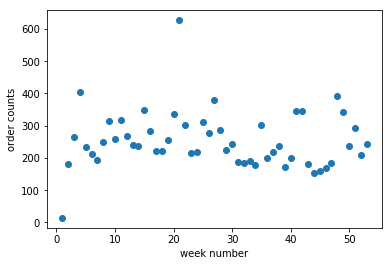

In [3]:
# B)
df['date'] = pd.to_datetime(df['date'])
# calendar_week starts on Monday
df['calendar_week'] = df['date'].apply(lambda x: x.week)
# week_num increments when a new calendar_week starts
df['week_num'] = (df['calendar_week'].diff() != 0).cumsum()

s = df.groupby(df['week_num'], sort=False).size()
plt.scatter(s.index, s)
plt.ylabel('order counts')
plt.xlabel('week number')
plt.show()


In [4]:
# C)
print(df.groupby('gender').mean()['value'])
# The difference is not statistically significant.

gender
0    363.890006
1    350.708361
Name: value, dtype: float64


In [5]:
# D)
def count(a, p):
    return len(df[
            (df['gender'] == a) & (df['predicted_gender'] == p)]
               .index)


n = len(df.index)
print('Number of samples = %d' % n)

tn = count(0, 0)
fp = count(0, 1)
fn = count(1, 0)
tp = count(1, 1)
confusion_mat = np.array([[tn, fp], [fn, tp]])
print('\nConfusion matrix:\n', confusion_mat)

acc = (tn + tp) / n
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print('\nQuality of predictions:'
      '\nAccuracy = %.2f'
      '\nPrecision = %.2f'
      '\nRecall = %.2f' % (acc, precision, recall))

Number of samples = 13471

Confusion matrix:
 [[3349 3410]
 [1463 5249]]

Quality of predictions:
Accuracy = 0.64
Precision = 0.61
Recall = 0.78


In [6]:
# E)
''' Numpy for manipulating large matrices since it's faster and 
    eliminates repeatedly writing loops 
    ex. selecting all elements > 1 in a 1D int numpy array can 
        be done by simply writing a[a>1] '''

" Numpy for manipulating large matrices since it's faster and \n    eliminates repeatedly writing loops \n    ex. selecting all elements > 1 in a 1D int numpy array can \n        be done by simply writing a[a>1] "